In [1]:
%matplotlib inline
import matplotlib as plt
from matplotlib import style
style.use('fivethirtyeight')
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine,inspect, func, desc
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session
from sqlalchemy import Column, Integer, String, Float 

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
measurements = "Resources/hawaii_measurements.csv"
stations = "Resources/hawaii_stations.csv"
measurements = pd.read_csv(measurements)
stations = pd.read_csv(stations)

engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
measurements.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [7]:
stations

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [8]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine,reflect=True)
Base.classes.keys()


['measurement', 'station']

In [9]:
# We can view all of the classes that automap found

Measurement=Base.classes.measurement
Station=Base.classes.station
session=Session(engine)

In [10]:
session.query(Measurement.date).all()

[('2010-01-01'),
 ('2010-01-02'),
 ('2010-01-03'),
 ('2010-01-04'),
 ('2010-01-06'),
 ('2010-01-07'),
 ('2010-01-08'),
 ('2010-01-09'),
 ('2010-01-10'),
 ('2010-01-11'),
 ('2010-01-12'),
 ('2010-01-14'),
 ('2010-01-15'),
 ('2010-01-16'),
 ('2010-01-17'),
 ('2010-01-18'),
 ('2010-01-19'),
 ('2010-01-20'),
 ('2010-01-21'),
 ('2010-01-22'),
 ('2010-01-23'),
 ('2010-01-24'),
 ('2010-01-25'),
 ('2010-01-26'),
 ('2010-01-27'),
 ('2010-01-28'),
 ('2010-01-30'),
 ('2010-01-31'),
 ('2010-02-01'),
 ('2010-02-03'),
 ('2010-02-04'),
 ('2010-02-05'),
 ('2010-02-06'),
 ('2010-02-07'),
 ('2010-02-08'),
 ('2010-02-09'),
 ('2010-02-11'),
 ('2010-02-12'),
 ('2010-02-13'),
 ('2010-02-14'),
 ('2010-02-15'),
 ('2010-02-16'),
 ('2010-02-17'),
 ('2010-02-19'),
 ('2010-02-20'),
 ('2010-02-21'),
 ('2010-02-22'),
 ('2010-02-23'),
 ('2010-02-24'),
 ('2010-02-25'),
 ('2010-02-26'),
 ('2010-02-28'),
 ('2010-03-01'),
 ('2010-03-02'),
 ('2010-03-03'),
 ('2010-03-04'),
 ('2010-03-05'),
 ('2010-03-06'),
 ('2010-03-07'

# Exploratory Climate Analysis

In [11]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
from pprint import pprint

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores


# Sort the dataframe by date
year_result = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date.between('2016-08-23','2017-08-23')).order_by(Measurement.date).\
    all()

# Save the query results as a Pandas DataFrame and set the index to the date column
year_result = pd.DataFrame(year_result)

year_result

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


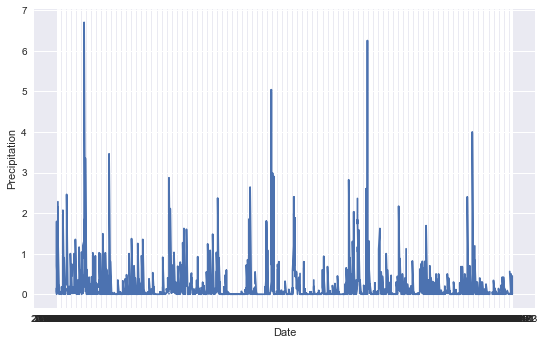

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(year_result.date, year_result.prcp)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.show();

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_result.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
prcp_sum = year_result.groupby('date').mean()['prcp'].astype(float)
prcp_sum = pd.DataFrame(prcp_sum)
prcp_sum = pd.pivot_table(prcp_sum, index=['date'], aggfunc='mean')
prcp_sum

,prcp
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


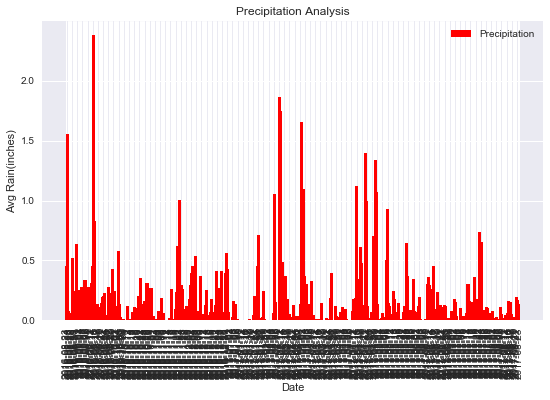

In [16]:
# Plot the dataframe as a horizontal bar chart using pandas plotting

plt.bar(prcp_sum.index, prcp_sum["prcp"], width=2.5, color="red")
plt.rcParams["figure.figsize"] = [12,6]
plt.xlabel("Date")
plt.ylabel("Avg Rain(inches)")
plt.title("Precipitation Analysis")
plt.legend(["Precipitation"])
plt.xticks(rotation=90)
plt.show()

In [17]:
# Design a query to show how many stations are available in this dataset?
no_of_stations = session.query(func.count(Station.id)).all()
print(f'Number of stations: {no_of_stations}')

Number of stations: [(9,)]


In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
                            group_by(Measurement.station).\
                            order_by(func.count(Measurement.tobs).desc()).all()

[('USC00519281', 'WAIKIKI 717.2, HI US', 24948),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 24516),
 ('USC00513117', 'WAIKIKI 717.2, HI US', 24381),
 ('USC00519523', 'WAIKIKI 717.2, HI US', 24021),
 ('USC00516128', 'WAIKIKI 717.2, HI US', 23508),
 ('USC00514830', 'WAIKIKI 717.2, HI US', 19818),
 ('USC00511918', 'WAIKIKI 717.2, HI US', 17811),
 ('USC00517948', 'WAIKIKI 717.2, HI US', 12348),
 ('USC00518838', 'WAIKIKI 717.2, HI US', 4599)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
query = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.station == 'USC00519281').all()

for Tmin, Tmax, Tavg in query:
    print(f'The min temp is {Tmin}, the max temp is {Tmax}, and the average temp is {Tavg}')

The min temp is 54.0, the max temp is 85.0, and the average temp is 71.66378066378067


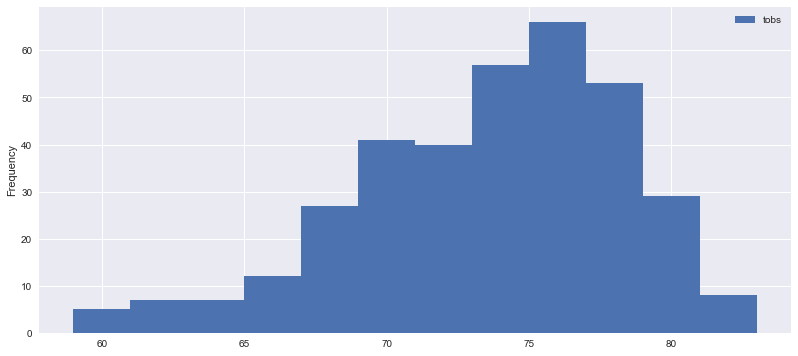

In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature = session.query(Measurement.tobs).\
    filter(Measurement.date.between('2016-08-23','2017-08-23')).order_by(Measurement.date).\
    filter(Measurement.station == 'USC00519281').all()
temperature = pd.DataFrame(temperature)
temperature

# Use Pandas Plotting with Matplotlib to plot the data
temperature.plot.hist(bins=12);

## Bonus Challenge Assignment

In [21]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 74.0, 69.57142857142857)]


In [22]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = dt.date(2018,8,15)- dt.timedelta(days = 365)
end_date = dt.date(2018,8,25)- dt.timedelta(days = 365)

tmin, tmax, tavg = calc_temps(start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'))[0]
print(f' The min temp is {tmin} the max temp is {tmax} and the average temp is {tavg}')

 The min temp is 70.0 the max temp is 85.0 and the average temp is 78.51428571428572


In [23]:
vacation_dates = session.query(Measurement.date, Measurement.tobs).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
# Load the results into a pandas dataframe.

vacation_temps = pd.DataFrame(vacation_dates, columns=['date', 'tobs'])
vacation_temps.head()

,date,tobs
0,2017-08-15,78.0
1,2017-08-18,80.0
2,2017-08-19,79.0
3,2017-08-20,81.0
4,2017-08-21,81.0


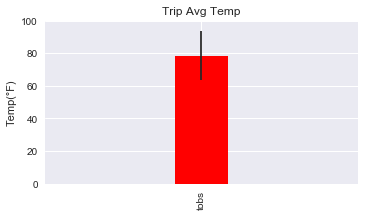

In [24]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


avg_temp = vacation_temps.mean()
temp_range = (vacation_temps["tobs"].max()-vacation_temps["tobs"].min())


p = avg_temp.plot(legend=False,kind="bar",color="red",yerr=temp_range, width=0.1, figsize=(5,3))
p.set_title("Trip Avg Temp")
p.set_ylabel("Temp(°F)")
p.set_ylim(0,100)
plt.show()

In [25]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
#.sum()groupby station name


In [26]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [27]:
# calculate the daily normals for your trip 
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates function date range, 
#format dates, run a for loop, create and append to normals[]
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date



In [30]:

start = dt.date(2018,8,15)
end = dt.date(2018,8,20)

#create a function called daily_normals that will calculate the daily normals for a specific date
def daily_normals(day_date):
    temps = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                          filter(func.strftime("%m-%d", Measurement.date) == day_date).all()
    return temps
    
#create a list of dates for your trip 
vacation_dates = pd.date_range(start, end)

#format it to %m-%d
trip_strf = vacation_dates.strftime('%m-%d')

#calculate the normals for each date string and append the results to a list
normals_list = []
for vacation_dates in trip_strf:
    #unpack daily_normals
    normals_list.append(*daily_normals(vacation_dates))

#make a df
normals_df = pd.DataFrame(normals_list, columns = ['Tmin', 'Tavg', 'Tmax'])

#make the trip dates the index
normals_df['date'] = vacation_dates
normals_df = normals_df.set_index('date')


normals_df

,Tmin,Tavg,Tmax
date,,,
08-20,69.0,76.471698,83.0
08-20,69.0,76.080000,83.0
08-20,69.0,76.125000,83.0
08-20,70.0,76.923077,84.0
08-20,69.0,75.946429,85.0
08-20,68.0,76.452830,82.0


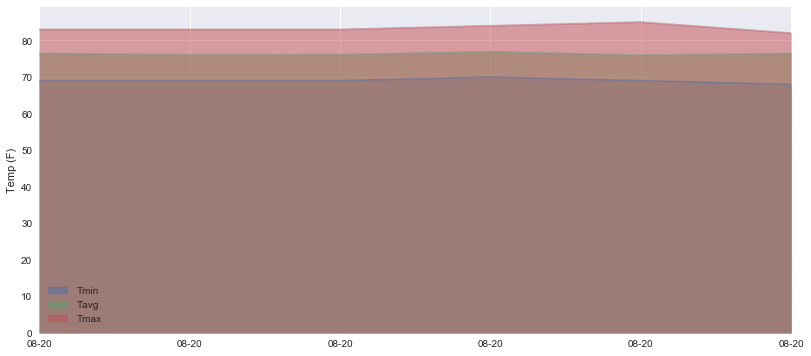

In [31]:
# Plot the daily normals as an area plot with `stacked=False`
normals_df.plot(kind='area', stacked=False)
#make the labels
plt.xlabel('')
plt.ylabel('Temp (F)')

plt.show()